In [1]:
import pandas as pd
import numpy as np
from typing import List

import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH_TO_DATA = "../../../Sistemas de Apoio a Decisão/dados_trabalho/nelson_teich.csv"

In [3]:
min_df = pd.read_csv(PATH_TO_DATA)

# Nelson Teich

In [4]:
aux = {
    "positivos": [(min_df["sentiment"] == "Positivo").sum()],
    "neutros": [(min_df["sentiment"] == "Neutro").sum()],
    "negativos": [(min_df["sentiment"] == "Negativo").sum()],
}
pcts = pd.DataFrame(aux, index=["Nelson"])

In [5]:
pcts

,positivos,neutros,negativos
Nelson,27928,26062,46020


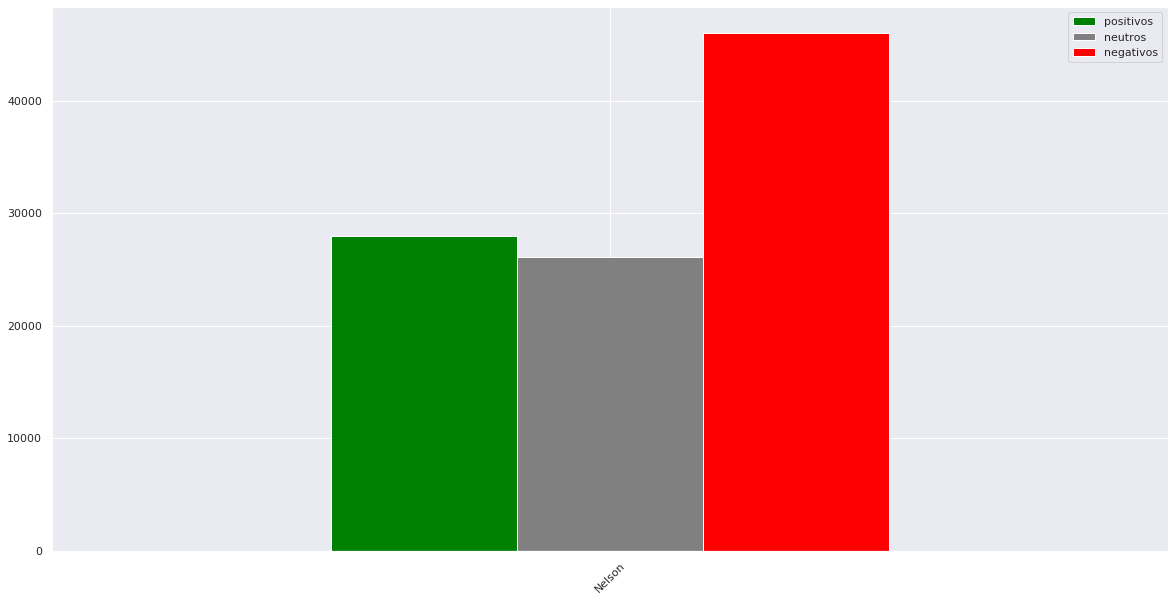

In [6]:
pcts.plot.bar(color=['green', 'gray', 'red'], rot=45)

# Hashtags mais frequentes

In [7]:
def get_hashtags(df: pd.DataFrame) -> List[str]:
    '''
    Função para extrair hashtags de uma string no formato: "['hashtag1', 'hashtag2']"
    '''
    all_hashtags = []
    for i in range(len(df)):
        raw = df["hashtags"].iloc[i][1:-1]
        if len(raw)  == 0: continue
        hashtags = [tag_to_clean.strip()[1:-1] for tag_to_clean in raw.split(",")]
        
        all_hashtags.extend(hashtags)
    
    return all_hashtags

In [8]:
hashtags_df = pd.DataFrame(get_hashtags(min_df), columns=["hashtag"])

In [9]:
hashtags_df

,hashtag
0,BolsonaroGenocida
1,ForaBolsonaro
2,impeachmentdobolsonaro
3,impeachmentdobolsonaro
4,ObrigadoMandetta
...,...
5497,Biroliro
5498,FicaEmCasa
5499,EiBolsonaro
5500,ForaBolsonaroGenocida


In [10]:
hashtag_count = {}
for hashtag in hashtags_df["hashtag"].unique().tolist():
    hashtag_count[hashtag] = (hashtags_df["hashtag"] == hashtag).sum()
    

In [11]:
unique_hashtags_df = pd.DataFrame(hashtag_count.values(), index=hashtag_count.keys(), columns=["quantidade"])
unique_hashtags_df.sort_values("quantidade", ascending=False, inplace=True)

In [12]:
unique_hashtags_df.head(10)

,quantidade
VaiPelaSombraMandetta,589
ForaBolsonaro,581
BandNews,288
Mandetta,269
TchauMandetta,268
BolsonaroVirus,213
BolsonaroGenocida,206
ForaBolsonaroUrgente,168
ImpeachmentdoBolsonaro,165
MandettaDEMITIDO,165


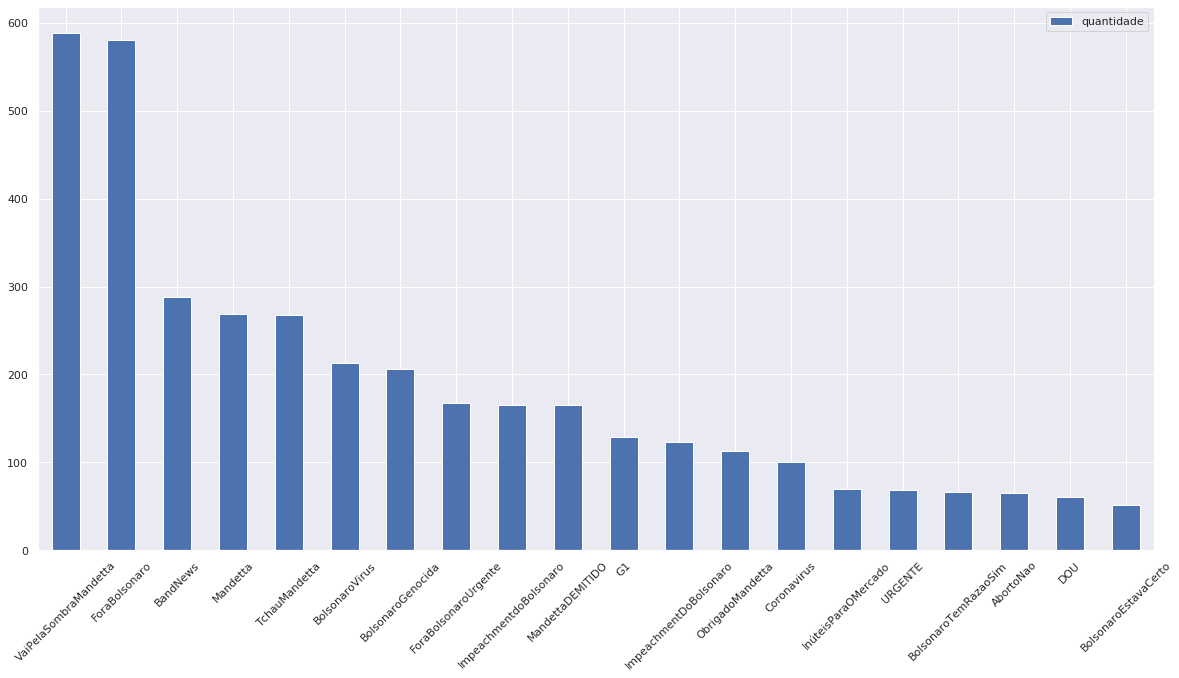

In [14]:
unique_hashtags_df.head(20).plot.bar(rot=45)

# Nuvem de palavras